<a href="https://colab.research.google.com/github/PaulToronto/DataCamp-Track---Machine-Learning-Scientist-in-Python/blob/main/5_1_Linear_Classifiers_in_Python_Applying_Logistic_Regression_and_SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 5-1 Linear Classifiers in Python - Applying Logistic Regression and SVM.

## Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import sklearn.datasets as datasets
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC, SVC

from mlxtend.plotting import plot_decision_regions

## scikit-learn refresher

### Supervised Learning Steps

#### Get the data

In the newgroups data
- The features are derived from the words appearing in each article
- The y values are the article topics, which is what we're trying to predict

In [2]:
newsgroups = datasets.fetch_20newsgroups_vectorized()

In [3]:
type(newsgroups)

sklearn.utils._bunch.Bunch

- The features are derived from the words appearing in each news article
- The target values are the article topics, which we are trying to predict

In [4]:
X, y = newsgroups.data, newsgroups.target

In [5]:
X.shape, y.shape

((11314, 130107), (11314,))

In [6]:
print(len(newsgroups.feature_names))
newsgroups.feature_names

130107


array(['00', '000', '0000', ..., 'íålittin', 'ñaustin', 'ýé'],
      dtype=object)

In [7]:
print(len(newsgroups.target_names))
newsgroups.target_names

20


['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [8]:
print(len(np.unique(y)))
np.unique(y, return_counts=True)

20


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 array([480, 584, 591, 590, 578, 593, 585, 594, 598, 597, 600, 595, 591,
        594, 593, 599, 546, 564, 465, 377]))

#### Fitting and predicting

In [9]:
knn = KNeighborsClassifier(n_neighbors=1)
knn

KNeighborsClassifier(n_neighbors=1)

In [10]:
knn.fit(X, y)

KNeighborsClassifier(n_neighbors=1)

In [11]:
y_pred = knn.predict(X)
y_pred

array([17,  7, 10, ..., 14, 12, 11])

#### Model evaluation

In [12]:
# quick way to find out the default score
knn.score

<bound method KNeighborsClassifier.score of KNeighborsClassifier(n_neighbors=1)>

In [13]:
knn.score(X, y)

0.9999116139296447

In [14]:
# manually
(sum(y_pred == y) / len(y)).item()

0.9999116139296447

- This accuracy score is not very meaningful because we want to know how well the model generalizes to unseen data

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((8485, 130107), (2829, 130107), (8485,), (2829,))

In [16]:
knn = KNeighborsClassifier(n_neighbors=1)

knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [17]:
# test score
knn.score(X_test, y_test)

0.6740897843761047

- The model does not do as well when predicting previously unseen data

## Applying logistic regression and SVM

### Using Logistic Regression

```python
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

lr.fit(X_train, y_train)

lr.predict(X_test)
lr.score(X_test, y_test)
```

### Wine data

In [18]:
wine = datasets.load_wine()
type(wine)

sklearn.utils._bunch.Bunch

In [19]:
X, y = wine.data, wine.target
X.shape, y.shape

((178, 13), (178,))

In [20]:
wine.feature_names

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

In [21]:
np.unique(y, return_counts=True)

(array([0, 1, 2]), array([59, 71, 48]))

In [22]:
wine.target_names

array(['class_0', 'class_1', 'class_2'], dtype='<U7')

In [23]:
lr = LogisticRegression()
lr.fit(wine.data, wine.target)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [24]:
lr.score(wine.data, wine.target)

0.9662921348314607

In [25]:
# very high probablity it is in the first class
lr.predict_proba(wine.data[:1])

array([[9.96560546e-01, 2.75534410e-03, 6.84109566e-04]])

In [26]:
# sum to 1
lr.predict_proba(wine.data[:1]).sum()

np.float64(0.9999999999999999)

In [27]:
lr.predict(wine.data[:1])

array([0])

### Using LinearSVC (Linear Support Vector Classifier)



In [28]:
svm = LinearSVC()
svm

LinearSVC()

In [29]:
svm.fit(wine.data, wine.target)

LinearSVC()

In [30]:
svm.score(wine.data, wine.target)

0.9887640449438202

### Using SVC

- This one is non-linear

In [31]:
svm_2 = SVC()
svm_2.fit(wine.data, wine.target)

SVC()

In [32]:
svm_2.score(wine.data, wine.target)

0.7078651685393258

- The accuracy of `SVC()` can be much improved by tuning hyperparameters
- Complex models like non-linear SVC are prone to overfitting

### Model Complexity Review:

- Underfitting: model is too simple, low training accuracy
- Overfitting: model is too complex, low test accuracy

### Digits Data

In [33]:
digits = datasets.load_digits()

In [34]:
digits.data

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [35]:
digits.target

array([0, 1, 2, ..., 8, 9, 8])

In [36]:
digits.target_names

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

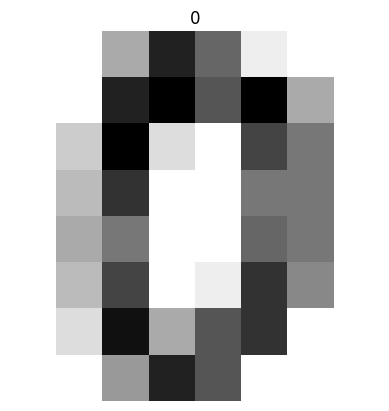

In [37]:
def plot_digit(image_data, label_data):
    image = image_data.reshape(8, 8)
    plt.imshow(image, cmap='binary')
    plt.axis('off')
    plt.title(label_data)

plot_digit(digits.data[0], digits.target[0])

In [38]:
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1347, 64), (450, 64), (1347,), (450,))

In [39]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [40]:
lr.score(X_train, y_train), lr.score(X_test, y_test)

(1.0, 0.9555555555555556)

In [41]:
svm = SVC()
svm.fit(X_train, y_train)

SVC()

In [42]:
svm.score(X_train, y_train), svm.score(X_test, y_test)

(0.9970304380103935, 0.9822222222222222)

### Sentiment analysis for movie reviews

- `X` contains features based on the number of times a word appears in a movie review
- `y` cotanins labels for whetere the review sentiment is postitive (1), or negative (-1)

```python
# Instantiate logistic regression and train
lr = LogisticRegression()
lr.fit(X, y)

# Predict sentiment for a glowing review
review1 = "LOVED IT! This movie was amazing. Top 10 this year."
review1_features = get_features(review1)
print("Review:", review1)
print("Probability of positive review:", lr.predict_proba(review1_features)[0,1])

# Predict sentiment for a poor review
review2 = "Total junk! I'll never watch a film by that director again, no matter how good the reviews."
review2_features = get_features(review2)
print("Review:", review2)
print("Probability of positive review:", lr.predict_proba(review2_features)[0,1])
```

## Linear classifiers

### Linear decision boundaries

- A **decision boundary** tells us what class our classifier will predict for any value of x.
- **linear boundary**: straight line, plane, hyperplane
- **non-linear boundary**: any other type of boundary; can lead to non-contiguous regions

### Definitions

- **classification**: learning to predict categories
- **decision boundary**: the surface separating different predicted classes
-  **linear classifier**: a classifier that learns linear decision boundaries
    - logistic regression
    - linear SVM
- A dataset is called **linearly separable** if it can be perfectly explained by a linear classifier

### Visualizing decision boundaries

In [43]:
X = np.array([[11.45,  2.4 ],
       [13.62,  4.95],
       [13.88,  1.89],
       [12.42,  2.55],
       [12.81,  2.31],
       [12.58,  1.29],
       [13.83,  1.57],
       [13.07,  1.5 ],
       [12.7 ,  3.55],
       [13.77,  1.9 ],
       [12.84,  2.96],
       [12.37,  1.63],
       [13.51,  1.8 ],
       [13.87,  1.9 ],
       [12.08,  1.39],
       [13.58,  1.66],
       [13.08,  3.9 ],
       [11.79,  2.13],
       [12.45,  3.03],
       [13.68,  1.83],
       [13.52,  3.17],
       [13.5 ,  3.12],
       [12.87,  4.61],
       [14.02,  1.68],
       [12.29,  3.17],
       [12.08,  1.13],
       [12.7 ,  3.87],
       [11.03,  1.51],
       [13.32,  3.24],
       [14.13,  4.1 ],
       [13.49,  1.66],
       [11.84,  2.89],
       [13.05,  2.05],
       [12.72,  1.81],
       [12.82,  3.37],
       [13.4 ,  4.6 ],
       [14.22,  3.99],
       [13.72,  1.43],
       [12.93,  2.81],
       [11.64,  2.06],
       [12.29,  1.61],
       [11.65,  1.67],
       [13.28,  1.64],
       [12.93,  3.8 ],
       [13.86,  1.35],
       [11.82,  1.72],
       [12.37,  1.17],
       [12.42,  1.61],
       [13.9 ,  1.68],
       [14.16,  2.51]])

In [44]:
y = np.array([ True,  True, False,  True,  True,  True, False, False,  True,
       False,  True,  True, False, False,  True, False,  True,  True,
        True, False,  True,  True,  True, False,  True,  True,  True,
        True,  True,  True,  True,  True, False,  True,  True,  True,
       False, False,  True,  True,  True,  True, False, False, False,
        True,  True,  True, False,  True], dtype=int)
y

array([1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 1, 1, 1, 0, 1])

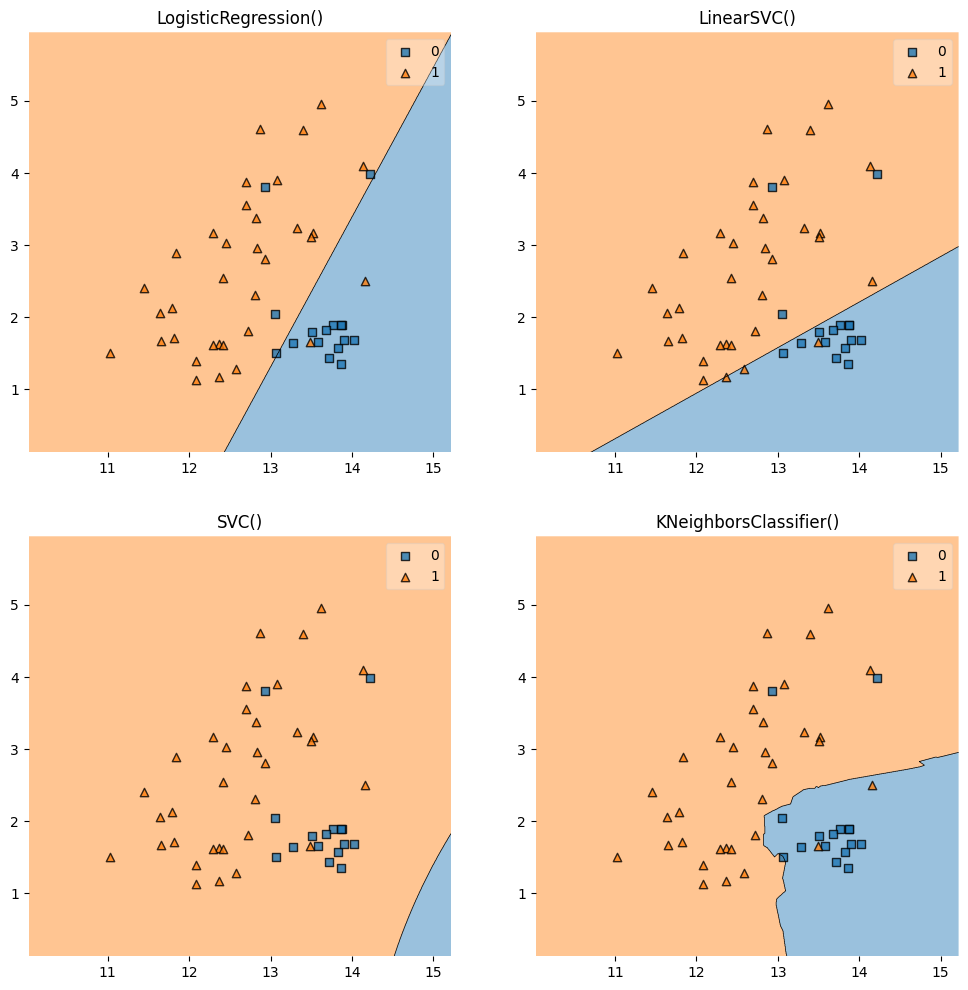

In [45]:
fig, axes = plt.subplots(2, 2, figsize = (12, 12))
axes = axes.flatten()

titles = ['LogisticRegression()',
          'LinearSVC()',
          'SVC()',
          'KNeighborsClassifier()']

classifiers = [LogisticRegression(),
               LinearSVC(),
               SVC(),
               KNeighborsClassifier()]

for i, c in enumerate(classifiers):
    c.fit(X, y)
    ax = plot_decision_regions(X, y, c, ax=axes[i])
    ax.set_title(titles[i])